<a href="https://colab.research.google.com/github/vasudevabhat0605/Image-Classification/blob/main/Images_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ipython-autotime
%load_ext autotime

time: 2.53 ms (started: 2021-05-18 14:36:40 +00:00)


In [2]:
#Data: #images


!pip install bing-image-downloader

time: 3.55 s (started: 2021-05-18 14:36:40 +00:00)


In [3]:
!mkdir images

time: 115 ms (started: 2021-05-18 14:36:43 +00:00)


In [4]:
from bing_image_downloader import downloader
downloader.download("leather cricket ball",limit=30,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://n2.sdlcdn.com/imgs/a/u/h/Kimati-Magnet-4-Piece-Leather-SDL531531752-1-51452.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://storage.sg.content-cdn.io/cdn-cgi/image/{width},{height},quality=75,format=auto/in-resources/b368029c-a4dd-448a-a888-58348cb1b144/Images/ProductImages/Source/DSCLB4008.JPG
[%] File Downloaded !

[%] Downloading Image #3 from https://images.fineartamerica.com/images-medium-large/red-leather-cricket-ball-on-grass-richard-thomas.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://energiefitnessshop.com/wp-content/uploads/2017/12/Cricket_Ball_PNG_Clipart_Picture.png
[%] File Downloaded !

[%] Downloading Image #5 from https://thumbs.dreamstime.com/z/used-leather-cricket-ball-18896548.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i1.wp.com/bloomun.in/wp-content/uploads/2020/02/20200129_125101-copy.jpg?fit=2000,1500&amp;ssl=1
[

In [5]:
from bing_image_downloader import downloader
downloader.download("car",limit=30,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://www.hdwallpapers.in/download/ferrari_f12berlinetta-1920x1080.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://wanna-joke.com/wp-content/uploads/2014/04/funny-picture-girl-car-dog-scared.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://usewallpaper.com/upload/san-pham/Aurora-nature-wallpaper-note-10-11-iphone-12-ios-13-14-background-21-1080x1920.jpg
[!] Issue getting: https://usewallpaper.com/upload/san-pham/Aurora-nature-wallpaper-note-10-11-iphone-12-ios-13-14-background-21-1080x1920.jpg
[!] Error:: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1091)>
[%] Downloading Image #3 from http://media.idownloadblog.com/wp-content/uploads/2015/03/Supercar-Black.png
[%] File Downloaded !

[%] Downloading Image #4 from https://www.gratistodo.com/wp-content/uploads/2016/08/GTA-5-14-800x500.jpg
[%] File Downloa

In [48]:
#preprocessing
#1 resize
#2 flatter

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['car','leather cricket ball']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array.shape)
    #plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

    

time: 29.8 s (started: 2021-05-18 15:29:00 +00:00)


In [14]:
len(flat_data[0])

67500

time: 10.7 ms (started: 2021-05-18 15:00:22 +00:00)


In [15]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

time: 7.95 ms (started: 2021-05-18 15:00:25 +00:00)


<BarContainer object of 2 artists>

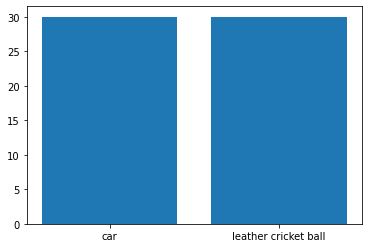

time: 161 ms (started: 2021-05-18 15:00:31 +00:00)


In [16]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [25]:
# spilt data into Training and Testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

time: 32.3 ms (started: 2021-05-18 15:07:24 +00:00)


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [{'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
              ]        
svc = svm.SVC(probability=True)  
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)  



GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 45.3 s (started: 2021-05-18 15:07:27 +00:00)


In [27]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

time: 103 ms (started: 2021-05-18 15:08:21 +00:00)


In [29]:
y_test

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

time: 5.74 ms (started: 2021-05-18 15:08:35 +00:00)


In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 1.43 ms (started: 2021-05-18 15:08:38 +00:00)


In [31]:
accuracy_score(y_pred,y_test)

0.8333333333333334

time: 6.43 ms (started: 2021-05-18 15:08:42 +00:00)


In [32]:
confusion_matrix(y_pred,y_test)

array([[11,  3],
       [ 0,  4]])

time: 7.58 ms (started: 2021-05-18 15:08:50 +00:00)


In [43]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 32.3 ms (started: 2021-05-18 15:23:55 +00:00)


In [44]:
model = pickle.load(open('img_model.p','rb')) 

time: 14.4 ms (started: 2021-05-18 15:23:57 +00:00)


Enter your URLhttps://tse2.mm.bing.net/th?id=OIP.EO0wdNUHxNmW3uyMdpHl9AHaEo&pid=Api&P=0&w=243&h=152
(152, 243, 3)
PREDICTED OUTPUT:car


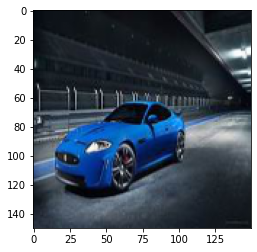

time: 52.2 s (started: 2021-05-18 15:40:57 +00:00)


In [56]:
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT:{y_out}')